In [1]:
########################################################
# All rights reserved. 
# Author: XIE Zhengwei @ Beijing Gigaceuticals Tech Co., Ltd 
#                      @ Peking University International Cancer Institute
# Contact: xiezhengwei@gmail.com
#
#
########################################################


import sys
import os
import rdkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem.AtomPairs import Pairs
from rdkit.Chem.Fingerprints import FingerprintMols


In [2]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [3]:
fda = pd.read_csv('../../data/Brief_FDA-Approved-Drug_961')

In [4]:
fda = pd.read_csv('../freeze_data/fda_CDK_fingerprints.txt',sep =' ')

In [5]:
fda

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1015,V1016,V1017,V1018,V1019,V1020,V1021,V1022,V1023,V1024
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
np = pd.read_csv('../freeze_data/np_CDK_fingerprints.txt',sep =' ')

In [7]:
np

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1015,V1016,V1017,V1018,V1019,V1020,V1021,V1022,V1023,V1024
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2720,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Liquiritin index is 353 (started from 0)

In [9]:
train_cdk = pd.read_csv('../freeze_data/train_CDK_fingerprints.txt',sep =' ')

test_cdk = pd.read_csv('../freeze_data/test_CDK_fingerprints.txt',sep =' ')

In [10]:
merge_dt2 = pd.concat([train_cdk, test_cdk, fda, np], ignore_index=True)

In [11]:
#mergeCDK_em2 = TSNE(n_components=2).fit_transform(merge_dt2.values)

In [12]:
#pd.DataFrame(mergeCDK_em2).to_csv('train_test_fda_np_tSNE.csv')

In [13]:
mergeCDK_em2 = pd.read_csv('../freeze_data/train_test_fda_np_tSNE.csv',index_col='Unnamed: 0')

In [14]:
mergeCDK_em2 = mergeCDK_em2.values

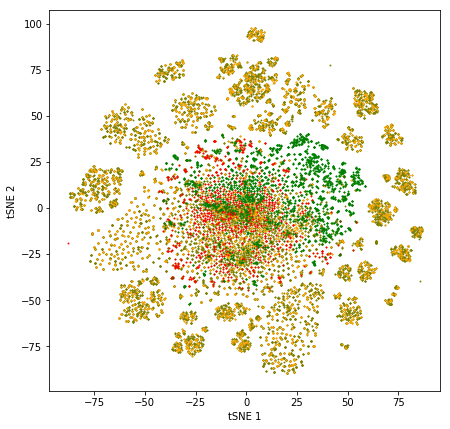

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(mergeCDK_em2[:train_cdk.shape[0],0], mergeCDK_em2[:train_cdk.shape[0],1],marker='.',s=3, color='olive')
plt.scatter(mergeCDK_em2[train_cdk.shape[0]:train_cdk.shape[0]+test_cdk.shape[0],0], mergeCDK_em2[train_cdk.shape[0]:train_cdk.shape[0]+test_cdk.shape[0],1],marker='.',s=3, color='orange')
plt.scatter(mergeCDK_em2[train_cdk.shape[0]+test_cdk.shape[0]:train_cdk.shape[0]+test_cdk.shape[0]+fda.shape[0],0], mergeCDK_em2[train_cdk.shape[0]+test_cdk.shape[0]:train_cdk.shape[0]+test_cdk.shape[0]+fda.shape[0],1],marker='.',s=3, color='r')
plt.scatter(mergeCDK_em2[train_cdk.shape[0]+test_cdk.shape[0]+fda.shape[0]:,0], mergeCDK_em2[train_cdk.shape[0]+test_cdk.shape[0]+fda.shape[0]:,1],marker='.',s=3, color='g')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.show()
#plt.savefig('Figures/train_test_CDK_fingerprints.svg', format='svg')

In [16]:
sc_brown = pd.read_csv('../freeze_data/np2720_Browning.csv')

In [17]:
np.shape

(2721, 1024)

In [18]:
cs_grp = []

for i in range(2720):
    cs_grp.append(sc_brown.loc[i,'score'])
cs_grp.append(0)

In [19]:
clr = cs_grp[353]
cs_grp

[-0.0,

 -0.0,

 -0.0,

 -0.0,

 -0.9473440252155372,

 -0.0,

 -0.0,

 -0.0,

 -0.0,

 -0.0,

 -0.0,

 -0.6694151079290601,

 -0.0,

 -0.4874029280259001,

 -0.7906837646454778,

 -0.8112623100455676,

 -0.9169450763383274,

 -0.6547544765422768,

 -0.0,

 -0.0,

 -0.5705407506186222,

 -0.6478444495154423,

 -0.848021300568348,

 -0.0,

 -0.6076420335018647,

 -0.0,

 -0.4591058681746547,

 -0.8300500602577177,

 -0.7244118632827263,

 -0.5594724062439832,

 -0.8074881802169278,

 -0.0,

 -0.9162399897312292,

 -0.4838792777631195,

 -0.0,

 -0.0,

 -0.0,

 -0.593054495796222,

 -0.5855044533662315,

 -0.0,

 -0.8419857235561323,

 -0.0,

 -0.0,

 -0.6985358087726681,

 -0.8967025835942124,

 -0.6947679186485156,

 -0.7618625696172743,

 -0.7711098116678908,

 -0.7343526039178214,

 -0.6800413246714352,

 -0.5755966940262853,

 -0.7560667755346535,

 -0.7333542511998061,

 -1.0400464234013878,

 -0.3811612624883229,

 -0.3800256362715804,

 -0.5701850874628291,

 -0.5162820631672027,

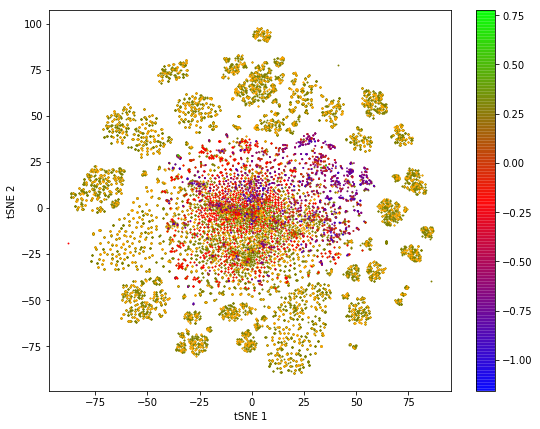

In [20]:
fig = plt.figure(figsize=(9,7))
plt.scatter(mergeCDK_em2[:train_cdk.shape[0],0], mergeCDK_em2[:train_cdk.shape[0],1],marker='.',s=3, color='olive')
plt.scatter(mergeCDK_em2[train_cdk.shape[0]:train_cdk.shape[0]+test_cdk.shape[0],0], mergeCDK_em2[train_cdk.shape[0]:train_cdk.shape[0]+test_cdk.shape[0],1],marker='.',s=3, color='orange')
plt.scatter(mergeCDK_em2[train_cdk.shape[0]+test_cdk.shape[0]:train_cdk.shape[0]+test_cdk.shape[0]+fda.shape[0],0], mergeCDK_em2[train_cdk.shape[0]+test_cdk.shape[0]:train_cdk.shape[0]+test_cdk.shape[0]+fda.shape[0],1],marker='.',s=3, color='r')
cax = plt.scatter(mergeCDK_em2[train_cdk.shape[0]+test_cdk.shape[0]+fda.shape[0]:,0], mergeCDK_em2[train_cdk.shape[0]+test_cdk.shape[0]+fda.shape[0]:,1],marker='.',s=3, c=cs_grp, alpha=0.8,cmap=plt.cm.get_cmap('brg'))
#plt.scatter(mergeCDK_em2[train_cdk.shape[0]+test_cdk.shape[0]+fda.shape[0]+354,0], mergeCDK_em2[train_cdk.shape[0]+test_cdk.shape[0]+fda.shape[0]+354,1],marker='o',s=18, color='cyan',edgecolors='k')

cbar = fig.colorbar(cax)
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.show()
#plt.savefig('Figures/train_test_CDK_Browning_fingerprints.svg', format='svg')

In [21]:
brown_sort = sc_brown.sort_values(by=['score'])
brown_sort

,Unnamed: 0,Unnamed: 0.1,ID,Name,CAS Number,SMILES,score
1480,1480,1480,T3S1611,Kuwanon E,68401-05-8,CC(=CCCC(=CCC1=C(C=C(C(=C1)C2CC(=O)C3=C(C=C(C=...,-1.156461
126,126,126,T2S0144,8-Geranyloxypsoralen,7437-55-0,CC(=CCCC(=CCOC1=C2C(=CC3=C1OC=C3)C=CC(=O)O2)C)C,-1.103979
2196,2196,2196,TTA2393,Trenbolone acetate,10161-34-9,CC(=O)OC1CCC2C3CCC4=CC(=O)CCC4=C3C=CC12C,-1.094570
1260,1260,1260,T6S1371,Isovitexin,38953-85-4,C1=CC(=CC=C1C2=CC(=O)C3=C(C(=C(C=C3O2)O)C4C(C(...,-1.083376
2008,2008,2008,TJS2214,3-O-demethylswertipunicoside,NaN,C1=C(C=C2C(=C1O)C(=O)C3=C(C(=CC(=C3O2)O)C4=C(C...,-1.082296
...,...,...,...,...,...,...,...
125,125,125,TWS0146,psoralenoside,905954-17-8,C1=COC2=CC(=C(C=C21)C=CC(=O)O)OC3C(C(C(C(O3)CO...,0.557303
2080,2080,2080,T6S2271,Vindoline,2182-14-1,CCC12C=CCN3CCC4(C13)C(N(C)C1=C4C=CC(OC)=C1)C(O...,0.665390
1067,1067,1067,T5S1140,Ganoderic acid B,81907-61-1,CC(CC(=O)CC(C)C(=O)O)C1CC(=O)C2(C1(CC(=O)C3=C2...,0.708813
1665,1665,1665,T4S1820,Parishin A,62499-28-9,C1=CC(=CC=C1COC(=O)CC(CC(=O)OCC2=CC=C(C=C2)OC3...,0.729592
